# Random Forest for Budapest

# Importing Libraries and Data

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [36]:
# Set a path

path = r'/Users/roxanamiu/Documents/Climate Change project 2'

In [37]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [38]:
# Import cleaned weather observations data

X = pd.read_csv(os.path.join(path, 'Prepared', 'X_cleaned_date.csv'), index_col = False)

In [39]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, 'Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [40]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0

In [41]:
X.shape

(22950, 137)

In [42]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
answers.shape

(22950, 16)

# Data Wrangling

In [44]:
budapest_list = list(x for x in X.columns if x.find('BUDAPEST') >=0) #make a list with columns containing Heathrow
budapest_list

['BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max']

In [45]:
# Create a dataframe with those columns

df_budapest = X[budapest_list]
df_budapest

,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max
0,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1
1,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1
2,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3
3,4,0.67,1.017,0.19,0.00,0.0,2.0,0.4,4.4
4,4,0.67,1.017,0.19,0.00,0.0,2.5,1.1,5.3
...,...,...,...,...,...,...,...,...,...
22945,4,0.67,1.017,1.41,0.14,5.4,11.7,7.9,16.2
22946,4,0.67,1.017,1.41,0.14,5.4,11.7,7.9,16.2
22947,4,0.67,1.017,1.41,0.14,5.4,11.7,7.9,16.2
22948,4,0.67,1.017,1.41,0.14,5.4,11.7,7.9,16.2


In [46]:
# Reduce answers dataset to BELGRADE answers only

answers_budapest = answers['BUDAPEST_pleasant_weather']
answers_budapest

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BUDAPEST_pleasant_weather, Length: 22950, dtype: int64

In [47]:
df_budapest.shape # the shape is correct

(22950, 9)

In [48]:
answers_budapest.shape # the shape for predictions is correct

(22950,)

# Reshaping for modeling

In [49]:
X2 = df_budapest

In [50]:
y2 = answers_budapest

In [51]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [52]:
X.shape

(22950, 9)

In [53]:
y.shape

(22950,)

# Data Split 

In [54]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [55]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [56]:
X_train

array([[ 5.    ,  0.54  ,  1.0125, ..., 22.5   , 18.6   , 27.1   ],
       [ 4.    ,  0.67  ,  1.017 , ..., -3.3   , -7.2   , -0.2   ],
       [ 6.    ,  0.67  ,  1.017 , ..., -0.4   , -1.3   ,  1.    ],
       ...,
       [ 8.    ,  0.82  ,  1.0176, ...,  8.8   ,  7.5   , 11.7   ],
       [ 4.    ,  0.67  ,  1.017 , ..., 19.8   , 16.4   , 24.3   ],
       [ 4.    ,  0.48  ,  1.0134, ..., 13.2   , 11.8   , 17.3   ]])

In [57]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [58]:
X_test

array([[ 4.    ,  0.67  ,  1.017 , ..., 19.4   , 17.8   , 25.4   ],
       [ 1.    ,  0.55  ,  1.0275, ...,  0.1   , -3.5   ,  3.4   ],
       [ 1.    ,  0.61  ,  1.0127, ..., 21.9   , 16.3   , 28.2   ],
       ...,
       [ 4.    ,  0.67  ,  1.017 , ..., 12.    ,  7.4   , 19.5   ],
       [ 3.    ,  0.66  ,  1.0187, ...,  7.2   ,  5.4   ,  9.4   ],
       [ 3.    ,  0.47  ,  1.0142, ..., 26.9   , 19.3   , 32.5   ]])

In [59]:
y_test

array([0, 0, 1, ..., 1, 0, 1])

# Random Forest Model

In [60]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=7)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


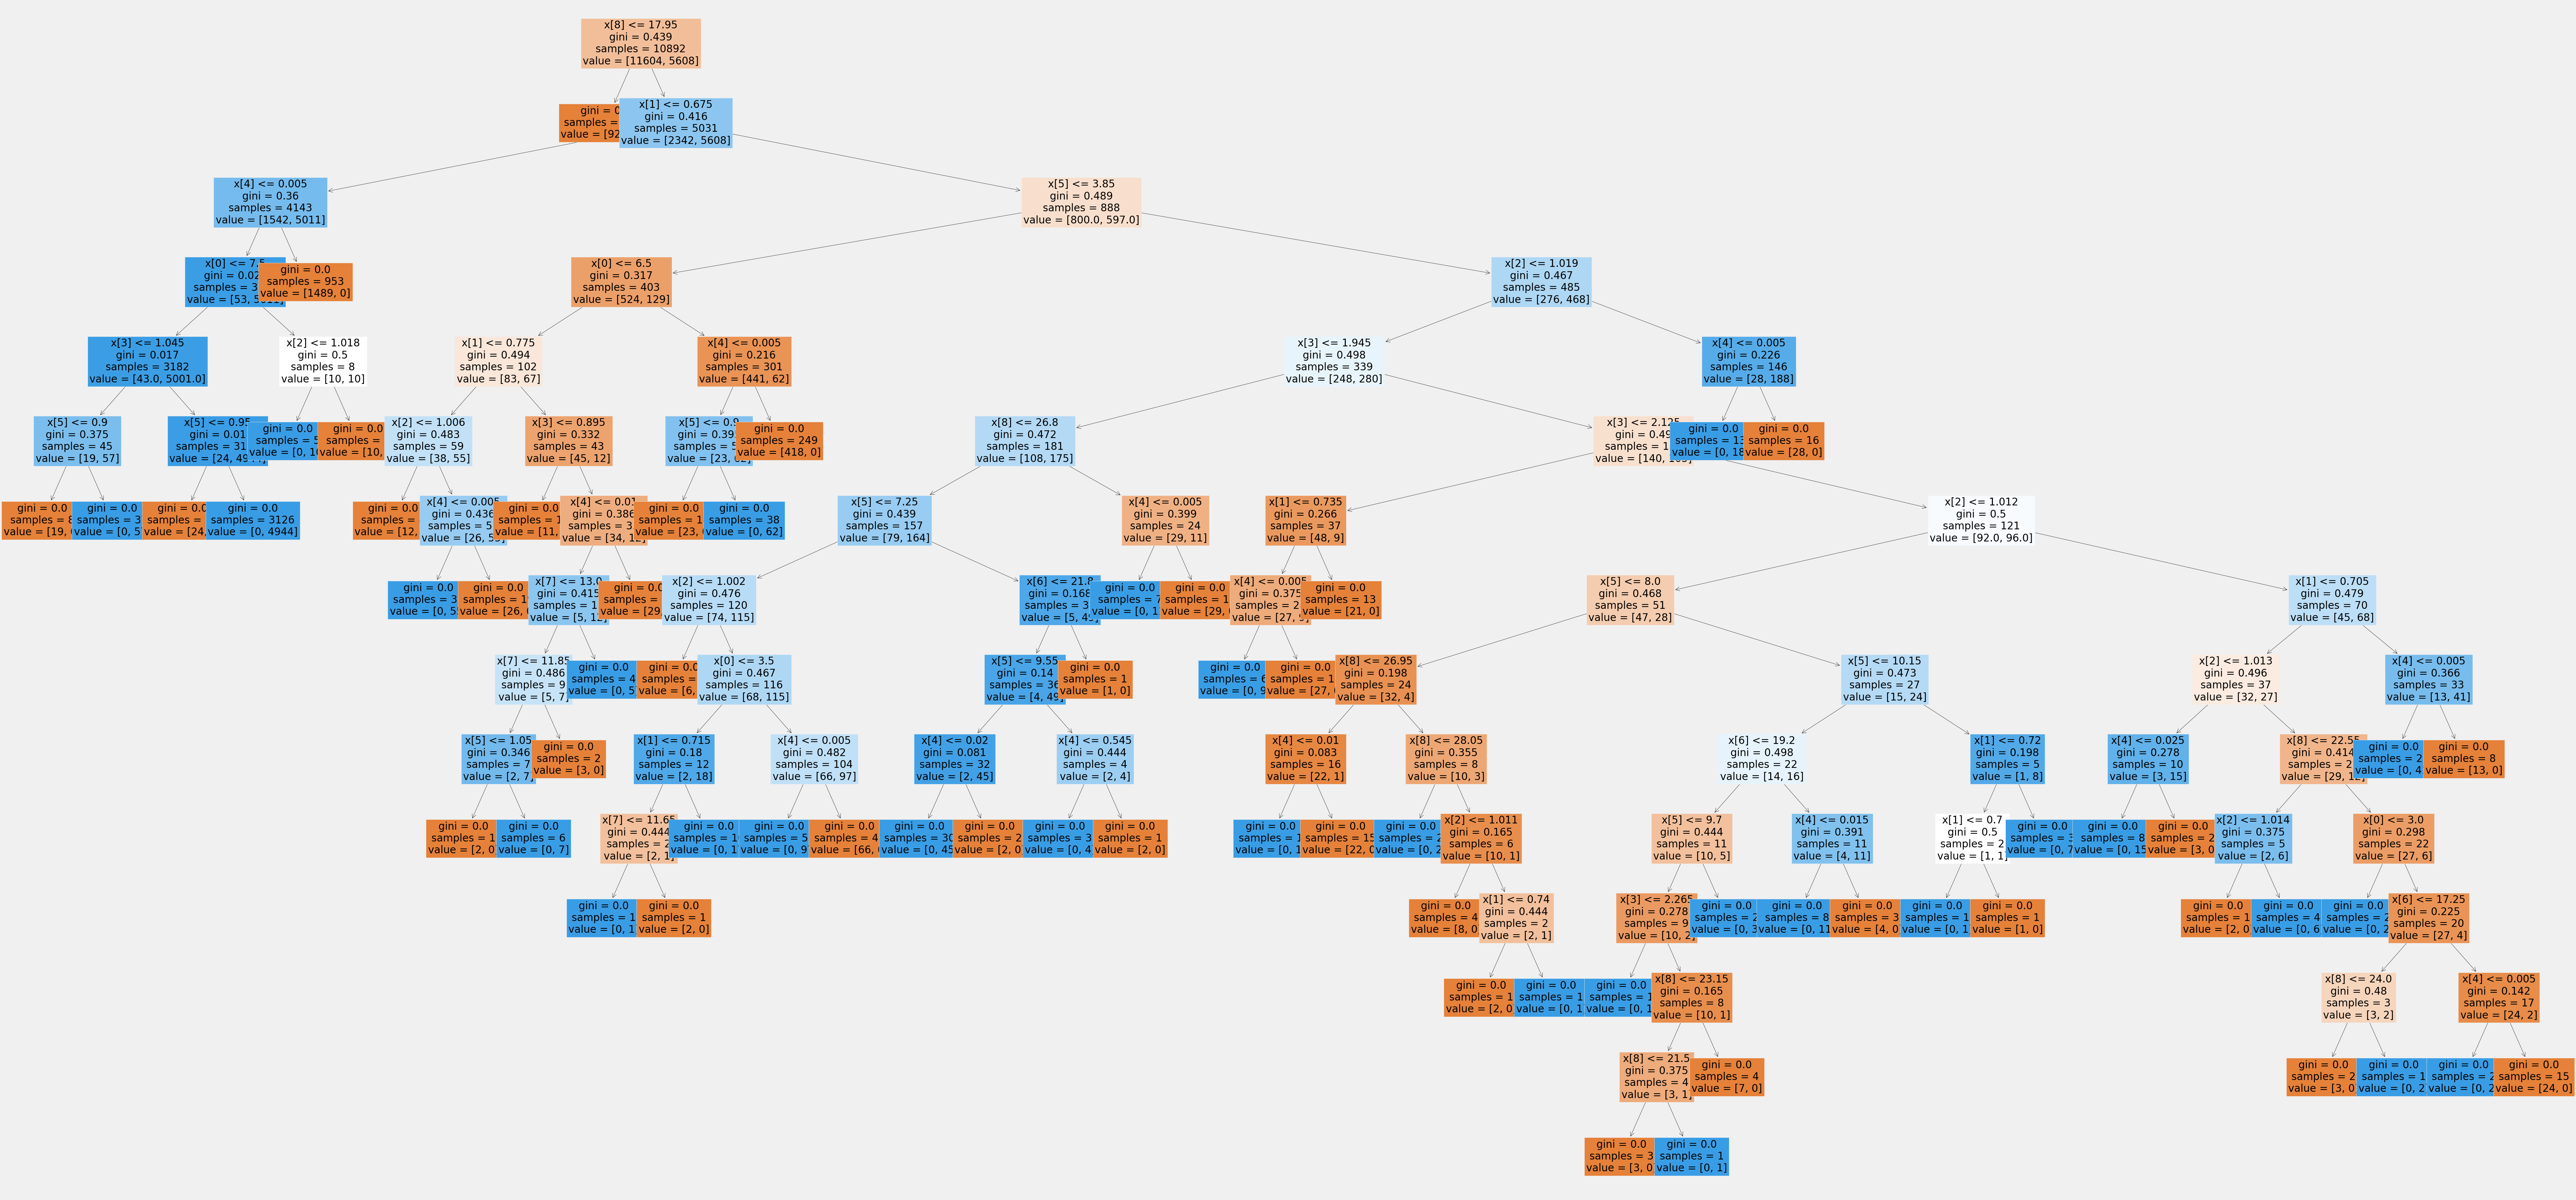

In [62]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [63]:
fig.savefig(os.path.join(path, 'Visualizations', 'random_forest_Belgrade.png'),bbox_inches='tight')

# Uncovering Feature Importances

In [64]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.01214941, 0.0080174 , 0.00483261, 0.03964867, 0.34776874,
       0.07543194, 0.18395517, 0.06746271, 0.26073336])

In [65]:
# Create a list of weather features

wx_list = [feature.replace('BELGRADE_', '') for feature in belgrade_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [66]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.012149
humidity            0.008017
pressure            0.004833
global_radiation    0.039649
precipitation       0.347769
sunshine            0.075432
temp_mean           0.183955
temp_min            0.067463
temp_max            0.260733
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


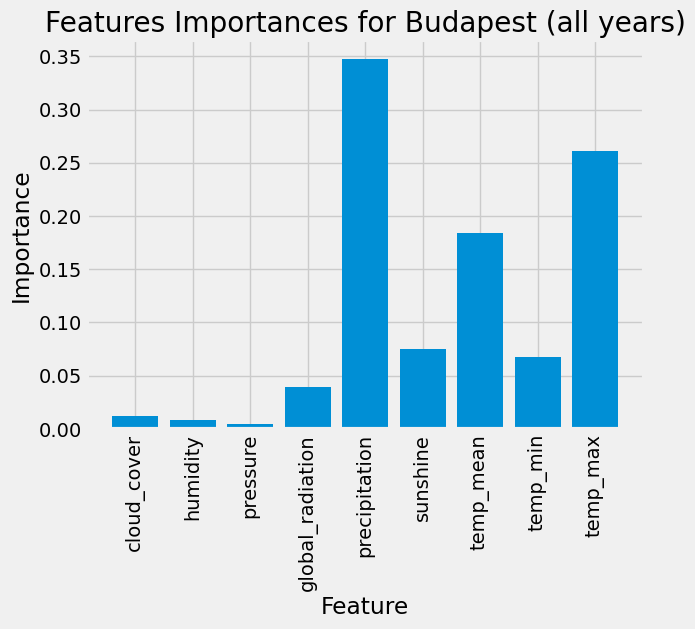

In [67]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Budapest (all years)');

plt.savefig(os.path.join(path, 'Visualizations', 'Budapest_feature_importances.png'), bbox_inches='tight')
plt.show()